# Voter separation


In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
from importlib import reload
import sys
from IPython.display import *
sys.path.append("..")
from src import vote_utils as vu
from src import plot_utils as pu
from src import dissimilarity_analysis as da
import matplotlib.pyplot as plt

COLOR_SHAS =  "#FFD700"  # gold, as in Shas logo
COLOR_AGUDA = "#1B3161"  # blue, as in Agudat Israel logo
COLOR_REST = "lightgrey"


%matplotlib inline

  0%|          | 0/1216 [00:00<?, ?it/s]

dict_keys(['df_data_boxes', 'df_data', 'fig_latest_point'])

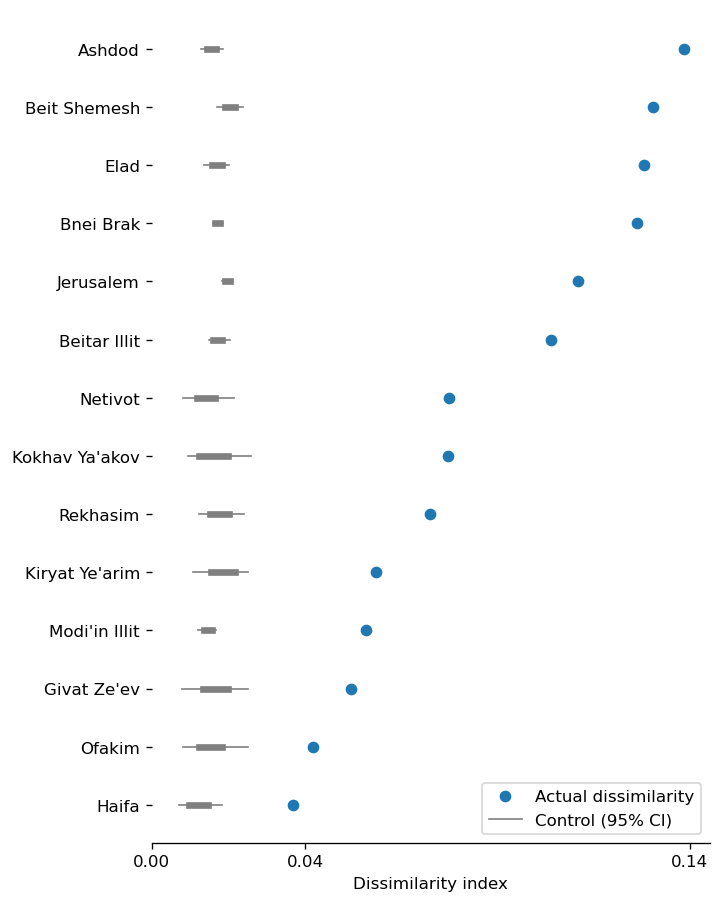

In [2]:
dct = da.main(knesset_numbers=25)
df_data = dct["df_data"]
dct.keys()

In [3]:
dct.keys()

dict_keys(['df_data_boxes', 'df_data', 'fig_latest_point'])

In [4]:
df_data.loc[df_data.knesset_number == 25][
   [ 'city_name', 'dissimilarity']
].sort_values('dissimilarity', ascending=False).set_index('city_name').round(5).head()


,dissimilarity
city_name,
Ashdod,0.13856
Beit Shemesh,0.13035
Elad,0.12805
Bnei Brak,0.12619
Jerusalem,0.11086


In [5]:
df_data.head()

,knesset_number,city_code,city_name,n_boxes,n_voters,n_legal,n_relevant_boxes,n_relevant_voters,n_relevant_legal,city_ref_ratio,city_ratios,dissimilarity,dissimilarity_simulation,simulation_fraction,y_city,y,n_haredi_population,fraction_haredim,fraction_haredim_of_jewish_population,fraction_of_total_haredim_in_israel
0,25,70,Ashdod,302,181784,116294,30,18030,15277,0.373512,"[4.488636363636363, 0.4025974025974026, 0.7676...",0.138561,"[0.01724419759793246, 0.015279297364209929, 0....",0.0,13,13,48626,0.214,0.241661,0.040902
1,25,2610,Beit Shemesh,133,78064,51275,63,37283,23530,0.436247,"[1.1104294478527608, 0.6784140969162996, 0.848...",0.130353,"[0.02187185191130145, 0.018791037036262705, 0....",0.0,12,12,115398,0.746,0.755351,0.097067
2,25,1309,Elad,39,23395,19637,36,21709,18231,1.383255,"[3.8472222222222223, 3.7157894736842105, 1.848...",0.128052,"[0.016732949957385487, 0.019827676094007034, 0...",0.0,11,11,46058,0.931,0.930954,0.038742
3,25,6100,Bnei Brak,187,115586,87692,170,105609,80933,0.471433,"[1.9333333333333333, 1.5033557046979866, 1.215...",0.126192,"[0.017341827569888838, 0.01682965660022105, 0....",0.0,10,10,202959,0.929,0.935351,0.170718
4,25,3000,Jerusalem,706,432125,264700,202,123662,79019,0.490935,"[0.41132075471698115, 0.7129186602870813, 0.90...",0.110863,"[0.020717220050373745, 0.020610200280267454, 0...",0.0,9,9,290090,0.295,0.499097,0.244008


In [6]:
df_data_boxes = dct["df_data_boxes"]
df_data_boxes.head()

,city_name,city_code,ballot_code,can_vote,voted,void,legal,party_avoda,party_bayit_yehudi,party_agudat_israel,...,party_tzadik,party_tzadik_sofit,party_kuf,party_kalkala_yehudit,party_kaf_kuf,party_kulanu,party_kavod_ezrahi,party_habayit_hayehudi,party_tikva,knesset_number
0,אבו גווייעד שבט,967,3.1,570,173,4,169,0,0,0,...,0,0,0,0,0,0,0,0,2,25
1,אבו גווייעד שבט,967,3.2,570,96,1,95,1,0,0,...,0,0,0,0,0,0,0,0,1,25
2,אבו גווייעד שבט,967,3.3,570,169,1,168,0,0,0,...,0,0,0,0,0,0,0,0,0,25
3,אבו גווייעד שבט,967,3.4,569,111,3,108,0,0,0,...,1,0,0,0,0,0,0,0,0,25
4,אבו גוש,472,1.1,598,360,7,353,1,0,0,...,0,1,0,0,0,0,0,0,0,25


671 out of 12,545 (5.3%) are homogenic


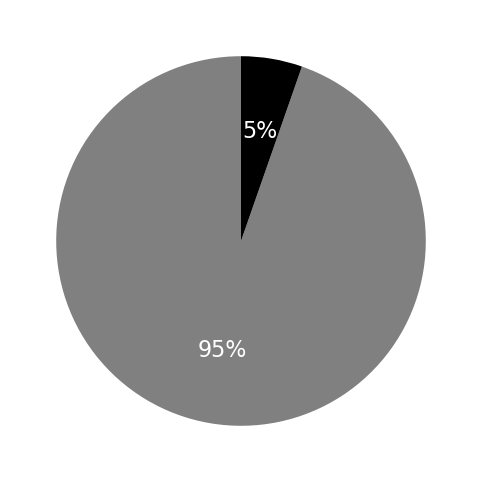

In [ ]:
haredi = vu.is_homogenic(df_data_boxes).sum()
non_haredi = df_data_boxes.shape[0] - haredi
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.pie(
    [non_haredi, haredi], labels=[pu.heb('לא חרדי'), pu.heb('חרדי')], autopct='%1.0f%%',
    colors=['gray', 'black'],
    textprops={'color': 'white', 'size': 16},
    startangle=90,

       )

print(f'{haredi:,d} out of {df_data_boxes.shape[0]:,d} ({100*haredi/df_data_boxes.shape[0]:.1f}%) are homogenic')


In [8]:


def plot_city(
    df, city, ax=None, startangle=90, add_labels=True, add_percent=True, str_title=None
):
    df_city = df.loc[df.city_name == city][
        ["party_shas", "party_agudat_israel", "legal"]
    ]
    rest = df_city.legal - df_city.party_shas - df_city.party_agudat_israel
    aguda = df_city.party_agudat_israel.sum()
    shas = df_city.party_shas.sum()
    rest = rest.sum()

    # Data for the pie chart
    sizes = [rest, aguda, shas]
    labels = ["אחרים", "אגודה", "שס"]
    colors = [COLOR_REST, COLOR_AGUDA, COLOR_SHAS]

    if ax is None:
        _, ax = plt.subplots(figsize=(3,3), dpi=300)

    if add_labels:
        labels_formatted = [
            pu.heb(label) for label in labels
        ]
    else:
        labels_formatted = [""] * len(labels)

    autopct = "%1.0f%%" if add_percent else None

    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels_formatted,
        colors=colors,
        autopct=autopct,
        startangle=startangle,
    )

    # Change text color for the "Shas" segment (index 1)
    for i, autotext in enumerate(autotexts):
        if i == 1:  # "Shas" is always index 1 in sizes
            autotext.set_color("white")
        else:
            autotext.set_color("black")

    if str_title is not None:
        ax.set_title(pu.heb(str_title))
    ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    return ax

<Axes: >

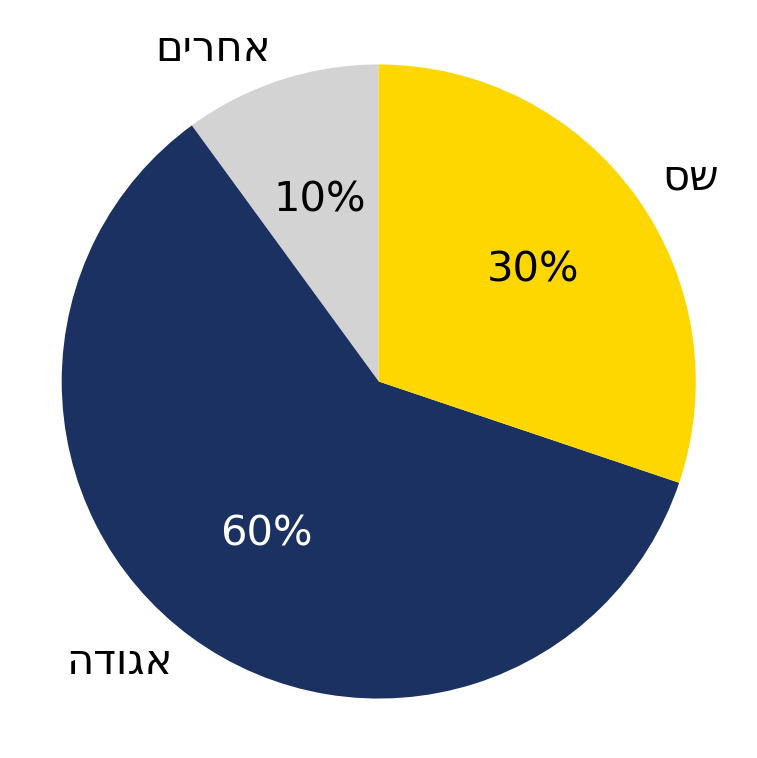

In [9]:
bnei_brak = "בני ברק"
plot_city(df_data_boxes, bnei_brak)

<Axes: >

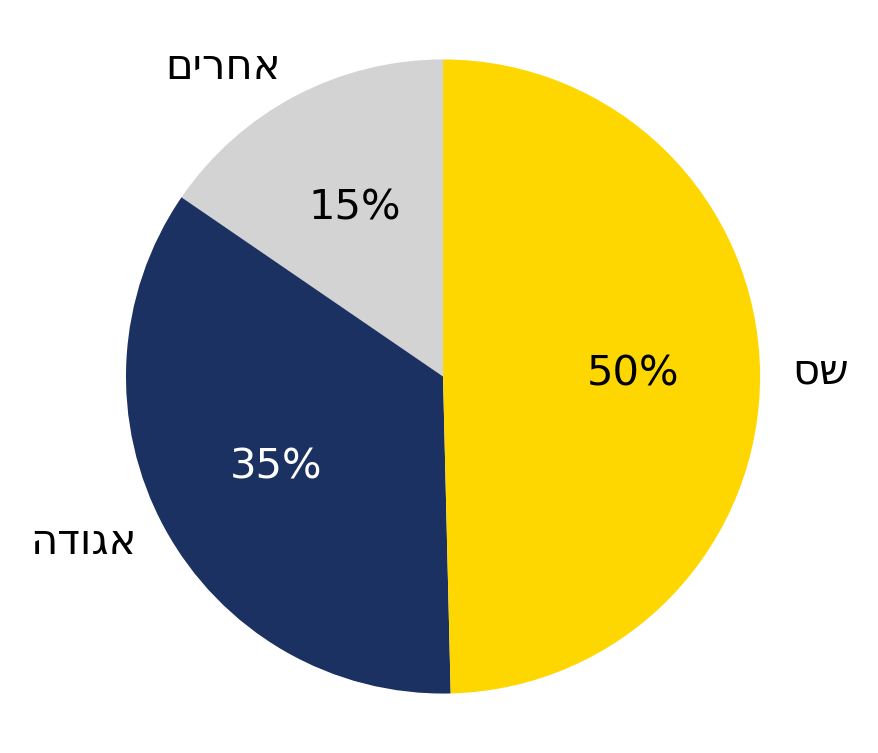

In [10]:
plot_city(df_data_boxes, "אלעד")

In [11]:
sel_homogenic = vu.is_homogenic(df_data_boxes)
sel_at_least_10_aguda = df_data_boxes.party_agudat_israel > 10
sel_not_too_many_shas = (df_data_boxes.party_shas + 1) / (
    df_data_boxes.party_agudat_israel + 1
) < 8
df_sels = pd.DataFrame(
    {
        "homogenic": sel_homogenic,
        "at_least_10_aguda": sel_at_least_10_aguda,
        "not_too_many_shas": sel_not_too_many_shas,
    }
)
df_sels.head()

,homogenic,at_least_10_aguda,not_too_many_shas
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


In [12]:
sel_haredi = sel_homogenic & sel_at_least_10_aguda & sel_not_too_many_shas
df_haredi_boxes = df_data_boxes.loc[sel_haredi]
df_haredi_boxes

,city_name,city_code,ballot_code,can_vote,voted,void,legal,party_avoda,party_bayit_yehudi,party_agudat_israel,...,party_tzadik,party_tzadik_sofit,party_kuf,party_kalkala_yehudit,party_kaf_kuf,party_kulanu,party_kavod_ezrahi,party_habayit_hayehudi,party_tikva,knesset_number
189,אופקים,31,11.0,657,533,3,530,0,1,285,...,1,0,0,0,1,0,0,0,0,25
190,אופקים,31,12.0,698,559,5,554,0,0,220,...,0,0,0,0,0,0,0,0,0,25
193,אופקים,31,15.2,641,500,4,496,2,2,222,...,0,0,0,0,0,0,0,0,0,25
200,אופקים,31,20.0,663,577,4,573,0,0,275,...,0,0,0,0,0,0,0,0,0,25
211,אופקים,31,33.0,515,422,7,415,0,0,214,...,0,0,0,0,1,0,0,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10935,רכסים,922,9.0,552,471,1,470,1,0,204,...,0,0,0,0,0,0,0,0,0,25
10936,רכסים,922,10.0,550,465,1,464,1,0,195,...,0,0,0,0,0,0,0,0,0,25
11762,תל אביב יפו,5000,21.0,655,592,1,591,2,0,479,...,1,0,0,0,0,0,0,0,0,25
12535,תפרח,709,1.0,549,480,3,477,0,0,337,...,0,0,0,0,0,0,0,0,0,25


All the country: 392,964 are shas vs 280,194 for aguda


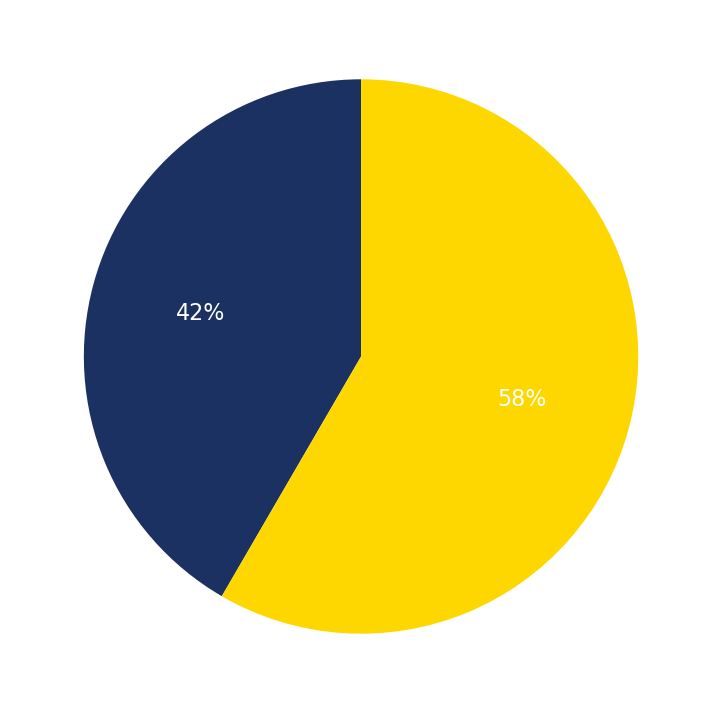

In [ ]:
shas_total = df_data_boxes.party_shas.sum()
aguda_total = df_data_boxes.party_agudat_israel.sum()
fig, ax = plt.subplots(figsize=(9,9), dpi=100)
ax.pie(
    [aguda_total, shas_total],
    labels=[pu.heb('אגודה'), pu.heb('שס')], autopct='%1.0f%%',
    colors=[COLOR_AGUDA, COLOR_SHAS],
    textprops={'color': 'white', 'size': 16},
    startangle=90,

       )
# ax.set_title(pu.heb('כל הארץ - יותר קולות לש״ס מלאגודה'))
print(f'All the country: {shas_total:,d} are shas vs {aguda_total:,d} for aguda')

89,621 are shas vs 180,268 for aguda


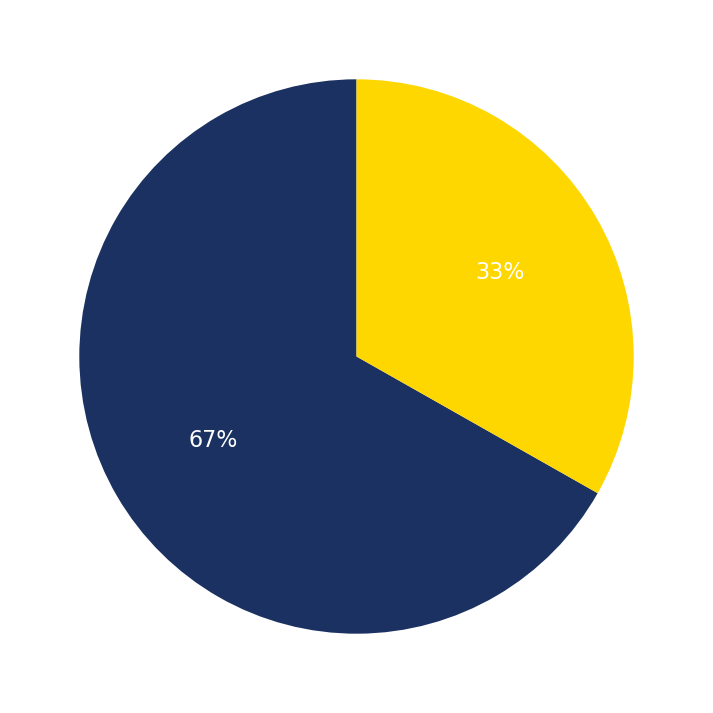

In [ ]:
shas_haredi_only = df_haredi_boxes.party_shas.sum()
aguda_haredi_only = df_haredi_boxes.party_agudat_israel.sum()
fig, ax = plt.subplots(figsize=(9,9), dpi=100)
ax.pie(
    [aguda_haredi_only, shas_haredi_only],
    labels=[pu.heb('אגודה'), pu.heb('שס')], autopct='%1.0f%%',
    colors=[COLOR_AGUDA, COLOR_SHAS],
    textprops={'color': 'white', 'size': 16},
    startangle=90,
)
print(f'{shas_haredi_only:,d} are shas vs {aguda_haredi_only:,d} for aguda')

In [15]:
df_haredi_boxes[df_haredi_boxes.city_name == 'אשדוד'].legal.sum()

15277

In [16]:
(
    df_haredi_boxes[df_haredi_boxes.city_name == 'אשדוד'].legal.sum(),
    df_data_boxes[df_data_boxes.city_name == 'אשדוד'].legal.sum()
)


(15277, 116294)

In [ ]:
df_ratio = df_haredi_boxes[['city_name', 'legal', 'party_shas', 'party_agudat_israel']].copy()
df_ratio['rest'] = df_haredi_boxes.legal - df_haredi_boxes.party_shas - df_haredi_boxes.party_agudat_israel
df_ratio = df_ratio.groupby('city_name').agg(sum)
df_ratio["perc_haredi"] = (
    100
    * (df_ratio.party_agudat_israel + df_ratio.party_shas)
    / (df_ratio.party_agudat_israel + df_ratio.party_shas + df_ratio.rest)
)
df_ratio['aguda_over_shas'] = df_ratio.party_agudat_israel / df_ratio.party_shas
df_ratio = df_ratio.sort_values('legal', ascending=False)
df_ratio = df_ratio.loc[
    ((df_ratio.party_agudat_israel + df_ratio.party_shas) > 1000) &
    (df_ratio.perc_haredi > 5)
]
df_ratio['total_haredi'] = df_ratio.party_agudat_israel + df_ratio.party_shas
df_ratio = df_ratio.sort_values('total_haredi', ascending=True).tail(10).copy()
# df_ratio = df_ratio.loc[df_ratio.total_haredi > 2500].copy()
print(f'{len(df_ratio)} cities')
df_ratio

10 cities


/var/folders/xy/6n3m38qx423b_gjbx89x02b40000gn/T/ipykernel_78977/221818888.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_ratio = df_ratio.groupby('city_name').agg(sum)


,legal,party_shas,party_agudat_israel,rest,perc_haredi,aguda_over_shas,total_haredi
city_name,,,,,,,
קרית יערים,2703,619,1746,338,87.495376,2.820679,2365
נתיבות,3221,2027,821,373,88.419745,0.405032,2848
רכסים,5837,2770,2412,655,88.778482,0.870758,5182
אשדוד,15277,3892,10420,965,93.683315,2.677287,14312
אלעד,17777,8726,6530,2521,85.818755,0.748338,15256
ביתר עילית,23688,7303,14081,2304,90.273556,1.928112,21384
בית שמש,23530,6504,14909,2117,91.002975,2.292282,21413
מודיעין עילית,26655,5277,20662,716,97.313825,3.915482,25939
ירושלים,79019,23097,47047,8875,88.768524,2.036931,70144


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal


def plot_haredi_data(df_ratio, what: Literal["total", "split", "difference"]):
    y = np.arange(df_ratio.shape[0])
    w = 5.5
    h = w * 9 / 16
    fig, ax = plt.subplots(figsize=(w, h), dpi=300)

    if what == "total":
        ax.barh(y=y, width=df_ratio.legal, color="darkgrey")

    elif what == "split":
        ax.barh(
            y=y,
            width=df_ratio.legal,
            color=COLOR_REST,
        )
        ax.barh(
            y=y,
            width=df_ratio.party_agudat_israel,
            color=COLOR_AGUDA,
        )
        ax.barh(
            y=y,
            width=df_ratio.party_shas,
            left=df_ratio.party_agudat_israel,
            color=COLOR_SHAS,
        )


    elif what == "difference":
        ax.barh(
            y=y,
            width=-df_ratio.party_agudat_israel,
            color=COLOR_AGUDA,
        )
        ax.barh(
            y=y,
            width=df_ratio.party_shas,
            color=COLOR_SHAS,
        )
        for yy, (city, row) in enumerate(df_ratio.iterrows()):
            if row.party_agudat_israel > row.party_shas:
                ax.barh(yy, -row.party_shas, color=COLOR_SHAS, alpha=0.25)
            else:
                ax.barh(yy, row.party_agudat_israel, color=COLOR_AGUDA, alpha=0.25)

    ax.set_yticks(y)
    ax.set_yticklabels([pu.heb(city) for city in df_ratio.index])
    sns.despine(ax=ax, left=True)
    if what == "difference":
        xticks = [-df_ratio.party_shas.max(), 0, df_ratio.party_agudat_israel.max()]
        ax.axvline(0, color='black', linewidth=1.0)
    else:
        mid_point = df_ratio.total_haredi.max() // 2
        # find the closest to mid_point tick
        diffs = np.abs(df_ratio.total_haredi - mid_point)
        ix = np.argmin(diffs)
        mid_city_data = df_ratio.iloc[ix].total_haredi
        xticks = [0, mid_city_data, df_ratio.total_haredi.max()]
    xticks = np.round(xticks, -1).astype(int)
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{abs(x):,}" for x in xticks])
    ax.set_xlabel(pu.heb('קולות בקלפיות החרדיות בלבד'))
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='y', size=0)
    return ax

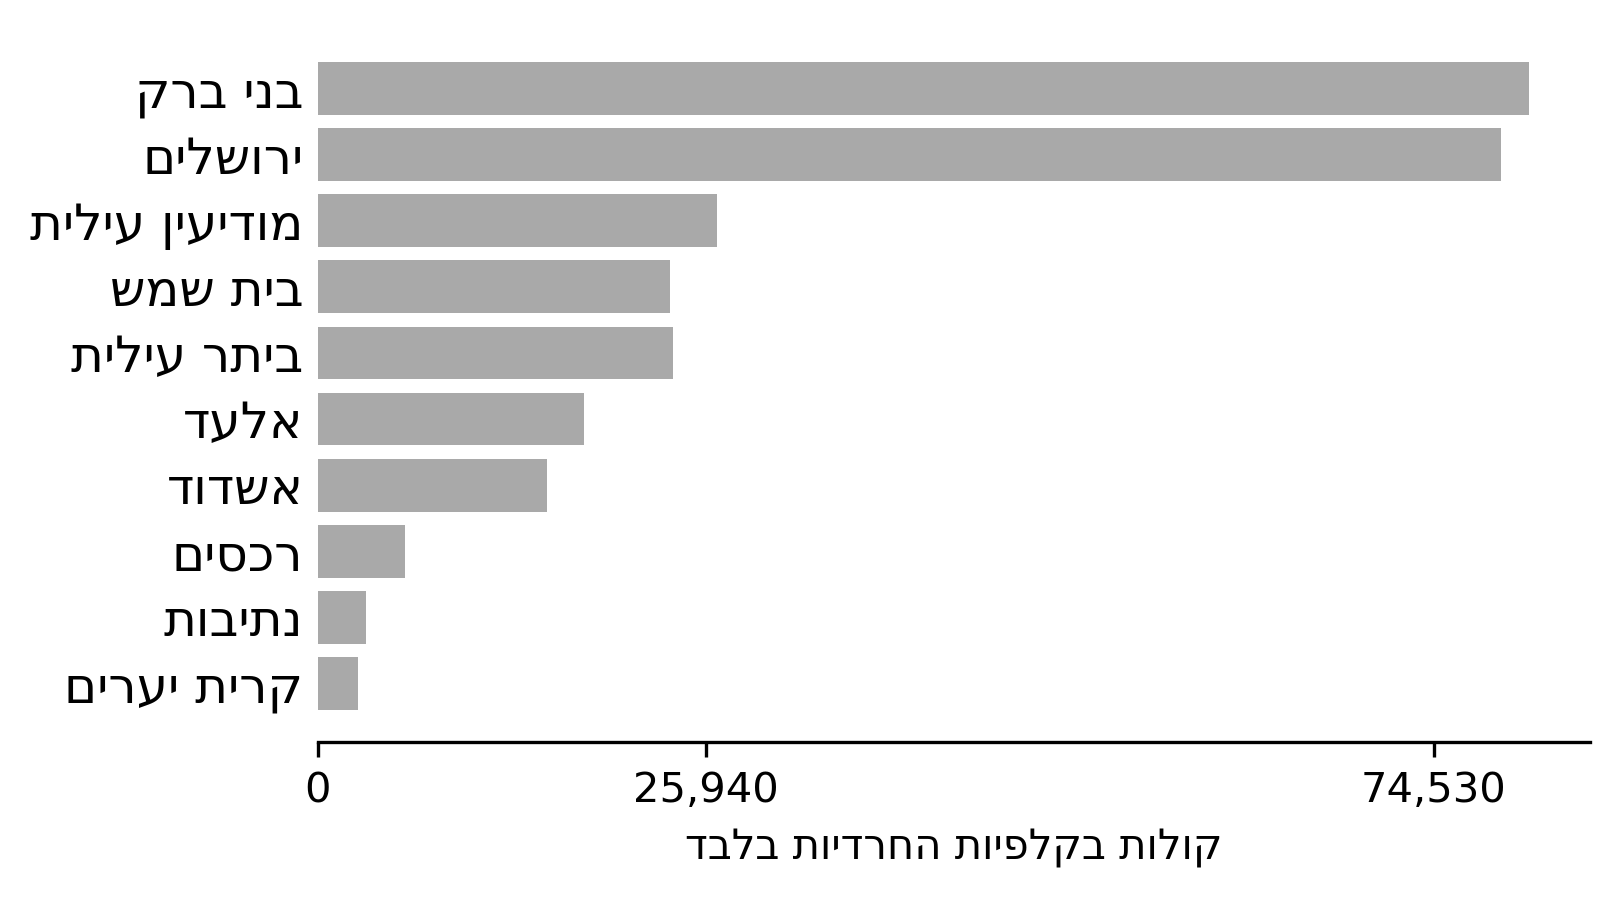

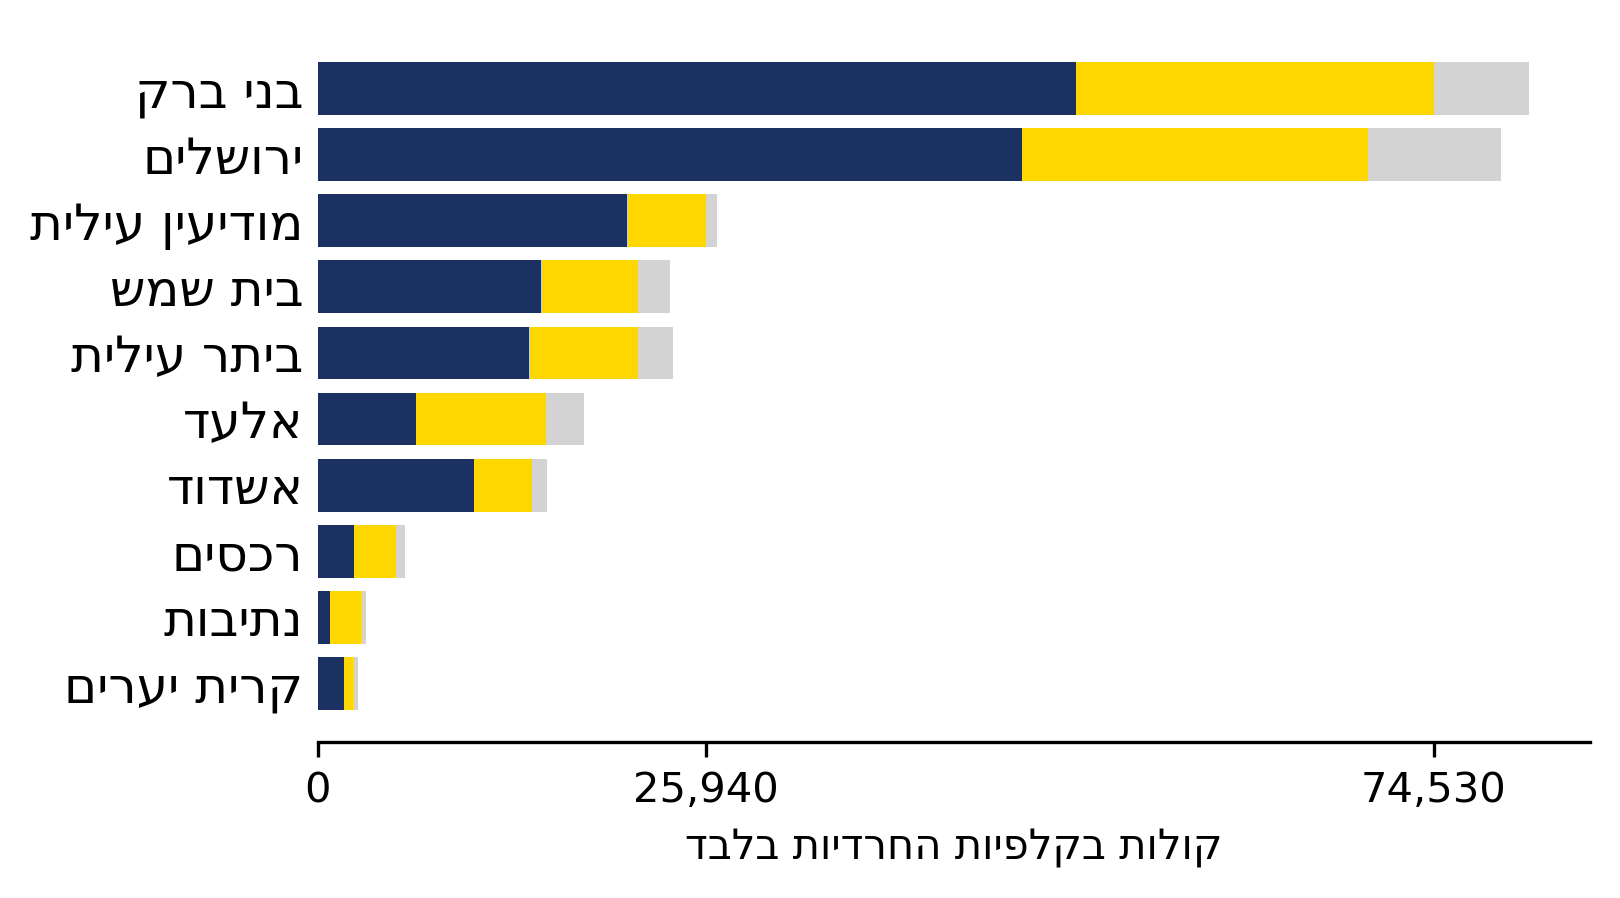

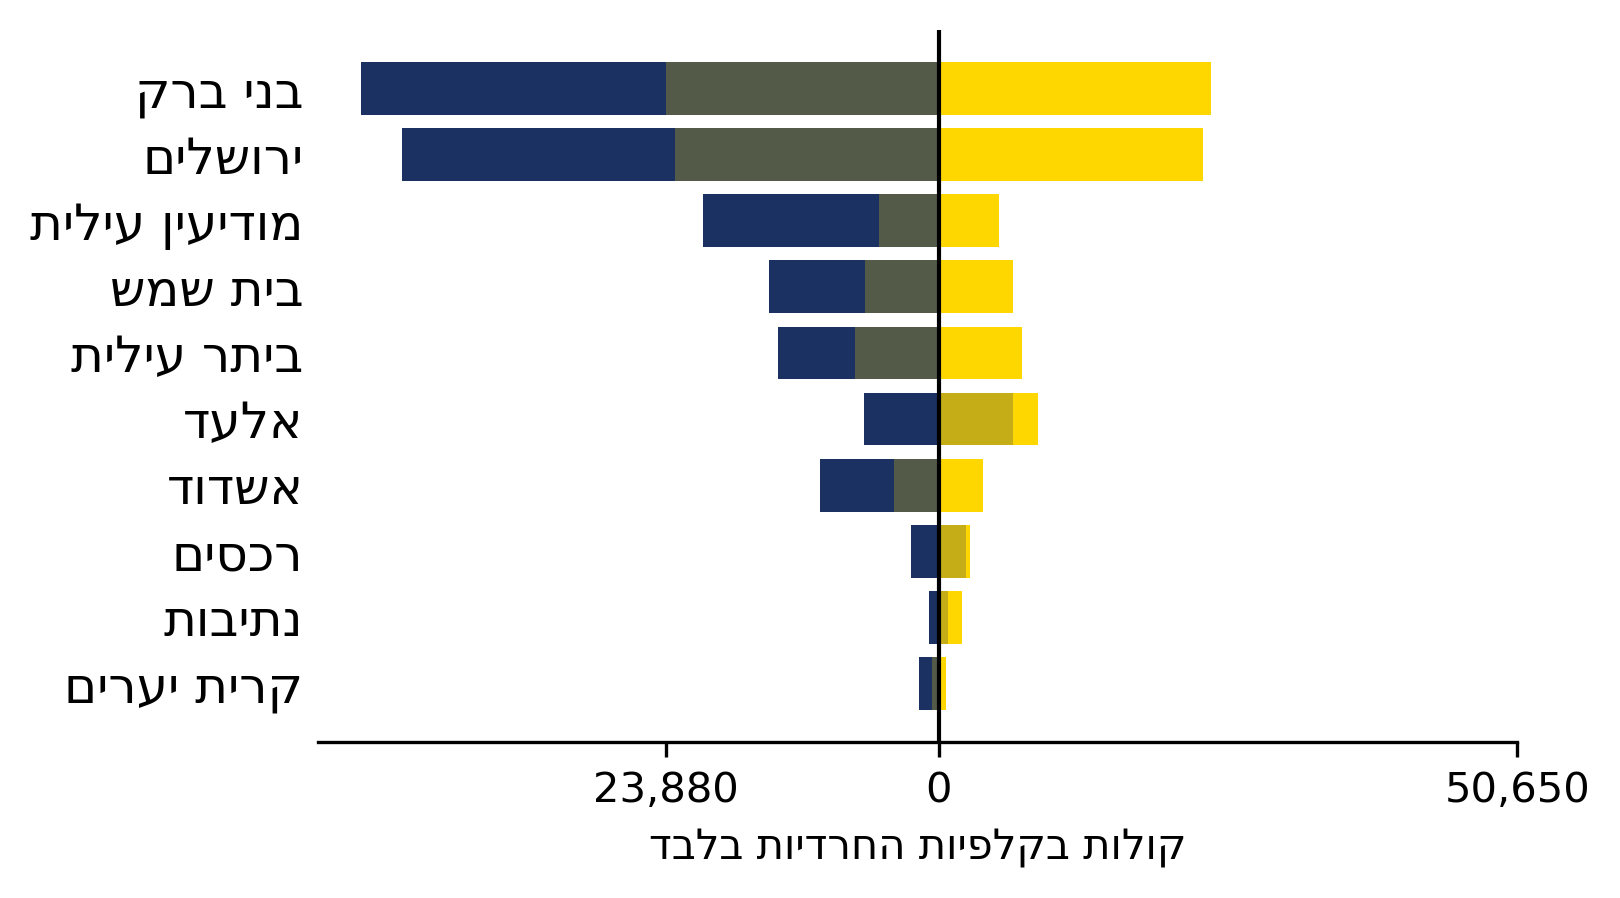

In [ ]:
for what in ["total", "split", "difference"]:
    ax = plot_haredi_data(df_ratio, what)
    fig = ax.get_figure()
    fig.tight_layout()


  0%|          | 0/8454 [00:00<?, ?it/s]

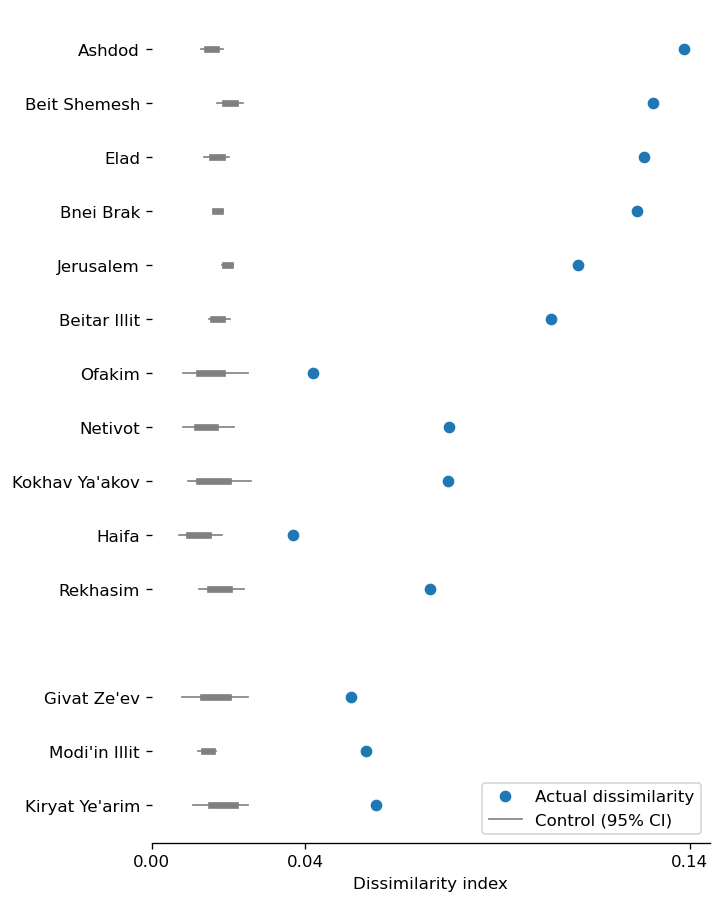

In [21]:

dct = da.main(knesset_numbers=list(range(19, 26)))
df_data_boxes = dct['df_data_boxes']

In [22]:
sel_ashdod = df_data_boxes.city_name == 'אשדוד'
cols_party = ['party_shas', 'party_agudat_israel', 'legal']
df_ashdod = df_data_boxes.loc[sel_ashdod].groupby('knesset_number')[cols_party].sum()
df_ashdod

,party_shas,party_agudat_israel,legal
knesset_number,,,
19,17458,10657,103274
20,11923,11132,113203
21,13262,13606,116381
22,16300,13627,115992
23,16994,13731,117619
24,15190,13351,110362
25,18254,15637,116294


In [40]:
df_election_dates = pd.read_csv('/Users/boris/devel/jce/segregation/data/external/election_dates.csv').set_index('knesset_number')
df_election_dates['election_date'] = pd.to_datetime(df_election_dates['election_date'])
df_ashdod['date'] = df_election_dates.loc[df_ashdod.index, 'election_date'].values


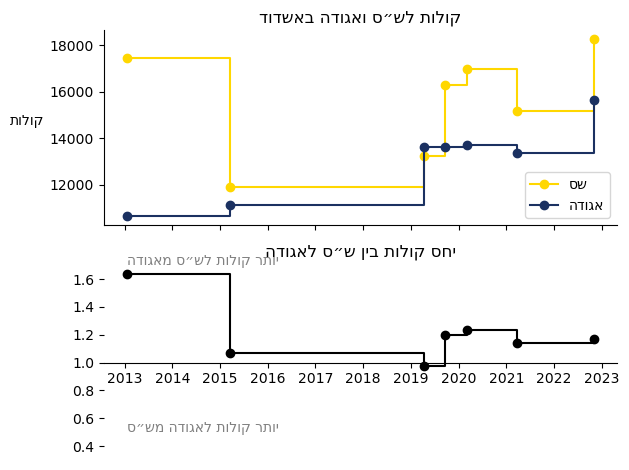

In [ ]:
fig, axes = plt.subplots(nrows=2, sharex=True)
x = df_ashdod['date'].values
ax = axes[0]
ax.step(x, df_ashdod.party_shas, "-o", where="post", label=pu.heb('שס'), color=COLOR_SHAS)
ax.step(x, df_ashdod.party_agudat_israel, "-o", where="post", label=pu.heb('אגודה'), color=COLOR_AGUDA)
ax.legend()
ax.set_ylabel(pu.heb('קולות'), rotation=0, ha='right')
sns.despine(ax=ax)
ax.set_title(pu.heb('קולות לש״ס ואגודה באשדוד'))

ax = axes[1]
y = (df_ashdod.party_shas / df_ashdod.party_agudat_israel).values
ax.step(x, y, "-o", where="post", label=pu.heb('שס/אגודה'), color='k')
ax.spines['bottom'].set_position(('data', 1.0))
ax.set_ylim([0.3, 1.7])
ax.text(x.min(), 1.7, pu.heb('יותר קולות לש״ס מאגודה'), fontsize=10, color='gray')
ax.text(x.min(), 0.5, pu.heb('יותר קולות לאגודה מש״ס'), fontsize=10, color='gray')
ax.set_title(pu.heb('יחס קולות בין ש״ס לאגודה'))
sns.despine(ax=ax, left=True)
fig.tight_layout()